In [1]:
!pip install flask-ngrok

Enter the path to the image: /content/drive/MyDrive/BRAIN TUMOR DETECTION/pred/pred0.jpg
1/1 [==============================] - 0s 97ms/step
[[0.08920878 0.8643222 ]]
Tumor detected


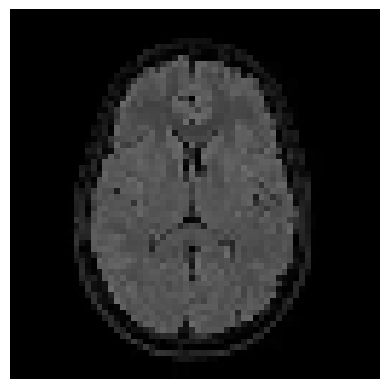

In [ ]:

from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/BRAIN TUMOR DETECTION/BrainTumor10EpochsCategorical.h5')
import cv2
# Get the image path from the user
xf = input("Enter the path to the image: ")

# Read the image using OpenCV
image = cv2.imread(xf)

# Resize the image to match the input size of the model
resized_image = cv2.resize(image, (64, 64))

# Normalize the pixel values
normalized_image = resized_image / 255.0

# Expand the dimensions to match the input shape of the model
input_img = np.expand_dims(normalized_image, axis=0)

# Perform prediction
result = model.predict(input_img)
print(result)

# Check the prediction result
if result[0][1] <=0.85:
    print("Tumor detected")
else:
    print("No tumor")

# Display the image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()





In [2]:
from flask import Flask, request, jsonify, render_template
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Initialize Flask application
app = Flask(__name__)

# Load the pre-trained model
model = load_model('/content/BrainTumor10EpochsCategorical.h5')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        # Get file from POST request
        file = request.files['file']

        # Save the file to a temporary location
        file_path = '/tmp/temp.jpg'
        file.save(file_path)

        # Read the image using OpenCV
        image = cv2.imread(file_path)

        # Resize the image to match the input size of the model
        resized_image = cv2.resize(image, (64, 64))

        # Normalize the pixel values
        normalized_image = resized_image / 255.0

        # Expand the dimensions to match the input shape of the model
        input_img = np.expand_dims(normalized_image, axis=0)

        # Perform prediction
        result = model.predict(input_img)
        tumor_probability = result[0][1]

        # Determine prediction result
        if tumor_probability <= 0.85:
            prediction = "Tumor detected"
        else:
            prediction = "No tumor"

        # Prepare response JSON
        response = {
            'prediction': prediction,
            'tumor_probability': float(tumor_probability)
        }

        return jsonify(response)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
